In [36]:
import sys
sys.path.append(r"C:\pythonprojects\probability\venv\Lib\site-packages")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
from folium.plugins import FastMarkerCluster

In [37]:
df=pd.read_csv("C:/Users/ashok/Downloads/rideshare_2022.csv",parse_dates = ['Trip Start Timestamp','Trip End Timestamp'])  #here we are converting the date columns data type into data object
#now we are going to select those columns with whom we are going to work
columns_of_interest = ['Trip Start Timestamp', 'Trip Seconds',
       'Trip Miles', 'Fare', 'Tip', 'Additional Charges', 'Trip Total', 'Shared Trip Authorized',
       'Trips Pooled', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude', 'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude']
df = df[columns_of_interest]
df


,Trip Start Timestamp,Trip Seconds,Trip Miles,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
0,2022-01-01 00:00:00,3905.0,44.5,55.0,0.0,11.25,66.25,0,1,41.972563,-87.678846,NaN,NaN
1,2022-01-01 00:00:00,2299.0,25.0,32.5,7.0,7.18,46.68,0,1,41.878866,-87.625192,NaN,NaN
2,2022-01-01 00:00:00,275.0,1.5,7.5,0.0,1.02,8.52,0,1,41.792357,-87.617931,41.812949,-87.617860
3,2022-01-01 00:00:00,243.0,1.0,5.0,0.0,2.36,7.36,0,1,41.936310,-87.651563,41.943155,-87.640698
4,2022-01-01 00:00:00,364.0,1.3,5.0,0.0,2.36,7.36,0,1,41.921855,-87.646211,41.936237,-87.656412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691093,2022-12-31 11:45:00,258.0,0.5,5.0,3.0,2.91,10.91,0,1,41.890922,-87.618868,41.890922,-87.618868
691094,2022-12-31 11:45:00,97.0,0.2,2.5,0.0,3.98,6.48,0,1,41.880994,-87.632746,41.877406,-87.621972
691095,2022-12-31 11:45:00,1653.0,18.7,22.5,0.0,0.64,23.14,1,1,41.836150,-87.648788,NaN,NaN
691096,2022-12-31 11:45:00,1027.0,6.7,15.0,5.0,4.63,24.63,0,1,41.874005,-87.663518,41.944227,-87.655998


In [38]:
df = df.rename(columns={i:'_'.join(i.split(' ')).lower() for i in df.columns})  #here we are renaming the column names based on spaces
df

,trip_start_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,trip_total,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude
0,2022-01-01 00:00:00,3905.0,44.5,55.0,0.0,11.25,66.25,0,1,41.972563,-87.678846,NaN,NaN
1,2022-01-01 00:00:00,2299.0,25.0,32.5,7.0,7.18,46.68,0,1,41.878866,-87.625192,NaN,NaN
2,2022-01-01 00:00:00,275.0,1.5,7.5,0.0,1.02,8.52,0,1,41.792357,-87.617931,41.812949,-87.617860
3,2022-01-01 00:00:00,243.0,1.0,5.0,0.0,2.36,7.36,0,1,41.936310,-87.651563,41.943155,-87.640698
4,2022-01-01 00:00:00,364.0,1.3,5.0,0.0,2.36,7.36,0,1,41.921855,-87.646211,41.936237,-87.656412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691093,2022-12-31 11:45:00,258.0,0.5,5.0,3.0,2.91,10.91,0,1,41.890922,-87.618868,41.890922,-87.618868
691094,2022-12-31 11:45:00,97.0,0.2,2.5,0.0,3.98,6.48,0,1,41.880994,-87.632746,41.877406,-87.621972
691095,2022-12-31 11:45:00,1653.0,18.7,22.5,0.0,0.64,23.14,1,1,41.836150,-87.648788,NaN,NaN
691096,2022-12-31 11:45:00,1027.0,6.7,15.0,5.0,4.63,24.63,0,1,41.874005,-87.663518,41.944227,-87.655998


In [39]:
df['date'] = pd.to_datetime(df['trip_start_timestamp'].dt.date) #here we are creating a new column named date having only the date value from the column trip start


array([[<Axes: title={'center': 'date'}>]], dtype=object)

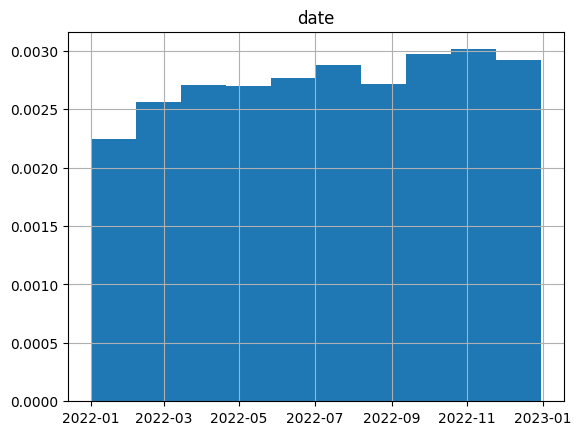

In [40]:
df.hist('date',density=True)  #we are plotting the probability density within the date intervals


In [41]:
df.columns

Index(['trip_start_timestamp', 'trip_seconds', 'trip_miles', 'fare', 'tip',
       'additional_charges', 'trip_total', 'shared_trip_authorized',
       'trips_pooled', 'pickup_centroid_latitude', 'pickup_centroid_longitude',
       'dropoff_centroid_latitude', 'dropoff_centroid_longitude', 'date'],
      dtype='object')

array([[<Axes: title={'center': 'tip'}>]], dtype=object)

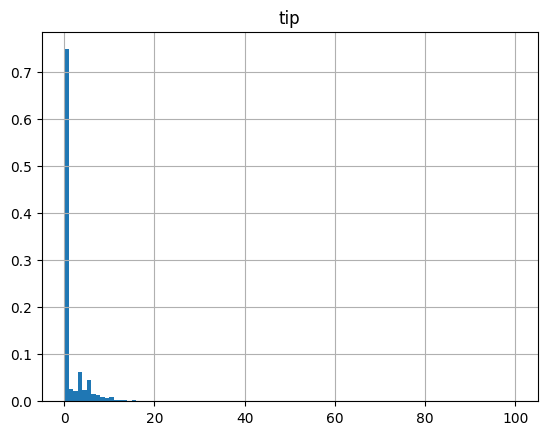

In [42]:
column_to_plot = 'tip'
df.hist(column_to_plot,density=True,bins = 100)  
#so from figure , the tip value ranges between 0 to 20 with maximum probability density here , and it decrease with increase in tip amount


The total number of tippers is : 173343
The total number of rides is : 691098
The percentage of tippers is : 25.08226040301086


,trip_start_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,trip_total,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,date
1,2022-01-01 00:00:00,2299.0,25.0,32.5,7.0,7.18,46.68,0,1,41.878866,-87.625192,NaN,NaN,2022-01-01
10,2022-01-01 00:00:00,714.0,2.8,7.5,6.0,2.77,16.27,0,1,41.809018,-87.659167,41.817366,-87.698861,2022-01-01
11,2022-01-01 00:00:00,964.0,1.5,10.0,5.0,2.87,17.87,0,1,41.885281,-87.657233,41.884987,-87.620993,2022-01-01
12,2022-01-01 00:00:00,1425.0,1.3,27.5,5.0,0.00,32.50,0,1,41.892042,-87.631864,41.891972,-87.612945,2022-01-01
16,2022-01-01 00:15:00,711.0,4.6,10.0,5.0,3.60,18.60,0,1,41.877406,-87.621972,41.908379,-87.670945,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691082,2022-12-31 11:45:00,469.0,1.9,7.5,3.0,2.91,13.41,0,1,41.965142,-87.676578,41.958155,-87.653022,2022-12-31
691087,2022-12-31 11:45:00,382.0,1.6,10.0,3.0,3.47,16.47,0,1,41.922083,-87.634156,41.942692,-87.651771,2022-12-31
691092,2022-12-31 11:45:00,1702.0,24.5,25.0,7.0,8.44,40.44,0,1,NaN,NaN,41.922686,-87.649489,2022-12-31
691093,2022-12-31 11:45:00,258.0,0.5,5.0,3.0,2.91,10.91,0,1,41.890922,-87.618868,41.890922,-87.618868,2022-12-31


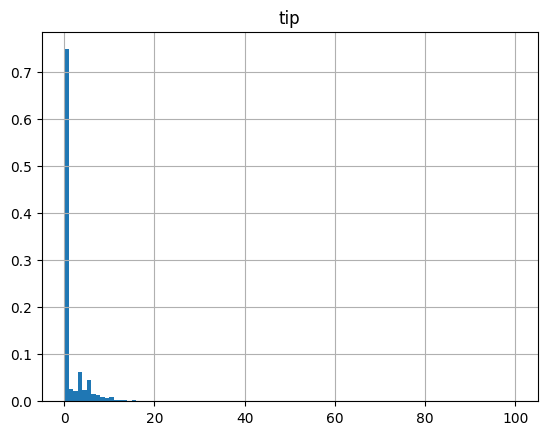

In [43]:
tippers = df['tip'] > 0
number_of_tippers = (tippers).sum()  #here we are counting the total number of tippers using the sum method as the sum method only adds the true boolean
number_of_tippers
print('The total number of tippers is :', number_of_tippers)
total_rides = len(df)
print('The total number of rides is :', total_rides)
percentage_of_tippers = (number_of_tippers / total_rides) * 100  #calculating the total number of tippers
print('The percentage of tippers is :', percentage_of_tippers)
df.hist('tip',density=True,bins=100)
df_tippers = df[tippers] #creating a new dataframe of the rideshares who got the tips
df_tippers

array([[<Axes: title={'center': 'tip'}>]], dtype=object)

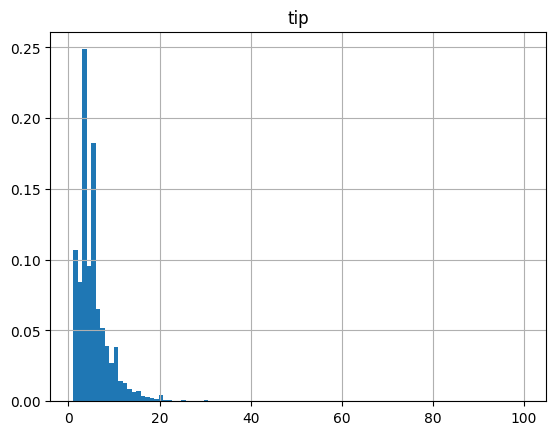

In [44]:
df_tippers.hist('tip',density=True,bins=100) #as we removed the non_tippers in this new df , so now the distribution looks way better

In [45]:
df['day_name'] = df['date'].dt.day_name()  #here we are creating a new column which stores the weekday 
daily_ride_counts=df['day_name'].value_counts()  #this calculates the total number of rides in each day of the week in the whole year
daily_ride_counts  #total number of rides in each day of the week both including tips and without tips

day_name
Saturday     132872
Friday       115923
Sunday        96959
Thursday      95721
Wednesday     88034
Tuesday       82576
Monday        79013
Name: count, dtype: int64

In [46]:
WEEKDAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the series given weekdays
daily_ride_counts = daily_ride_counts.reindex(WEEKDAYS)   #here we are reindexing the total ride counts based on the WEEKDAYS format
daily_ride_counts  #total number of rides with or without tips in all days of the week

day_name
Monday        79013
Tuesday       82576
Wednesday     88034
Thursday      95721
Friday       115923
Saturday     132872
Sunday        96959
Name: count, dtype: int64

In [47]:
df_tippers= df[tippers]  #here again we are creating a new df for the tippers after we added the day_name column in the original df
df_tippers

,trip_start_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,trip_total,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,date,day_name
1,2022-01-01 00:00:00,2299.0,25.0,32.5,7.0,7.18,46.68,0,1,41.878866,-87.625192,NaN,NaN,2022-01-01,Saturday
10,2022-01-01 00:00:00,714.0,2.8,7.5,6.0,2.77,16.27,0,1,41.809018,-87.659167,41.817366,-87.698861,2022-01-01,Saturday
11,2022-01-01 00:00:00,964.0,1.5,10.0,5.0,2.87,17.87,0,1,41.885281,-87.657233,41.884987,-87.620993,2022-01-01,Saturday
12,2022-01-01 00:00:00,1425.0,1.3,27.5,5.0,0.00,32.50,0,1,41.892042,-87.631864,41.891972,-87.612945,2022-01-01,Saturday
16,2022-01-01 00:15:00,711.0,4.6,10.0,5.0,3.60,18.60,0,1,41.877406,-87.621972,41.908379,-87.670945,2022-01-01,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691082,2022-12-31 11:45:00,469.0,1.9,7.5,3.0,2.91,13.41,0,1,41.965142,-87.676578,41.958155,-87.653022,2022-12-31,Saturday
691087,2022-12-31 11:45:00,382.0,1.6,10.0,3.0,3.47,16.47,0,1,41.922083,-87.634156,41.942692,-87.651771,2022-12-31,Saturday
691092,2022-12-31 11:45:00,1702.0,24.5,25.0,7.0,8.44,40.44,0,1,NaN,NaN,41.922686,-87.649489,2022-12-31,Saturday
691093,2022-12-31 11:45:00,258.0,0.5,5.0,3.0,2.91,10.91,0,1,41.890922,-87.618868,41.890922,-87.618868,2022-12-31,Saturday


In [48]:
daily_ride_counts_tip = df_tippers['day_name'].value_counts()
daily_ride_counts_tip=daily_ride_counts_tip.reindex(WEEKDAYS)
daily_ride_counts_tip  #total number of rides with tips in all the days of the week

day_name
Monday       19779
Tuesday      20898
Wednesday    22691
Thursday     24210
Friday       29256
Saturday     33215
Sunday       23294
Name: count, dtype: int64

In [49]:
df_final = pd.concat([daily_ride_counts,daily_ride_counts_tip],axis = 1 , keys = ['daily_ride_counts','daily_ride_counts_tip'])
df_final
df_final['percentage_of_tip_based_on_day'] = ((df_final['daily_ride_counts_tip'] / df_final['daily_ride_counts']) * 100).round(2)
df_final
df = df.drop(columns = ['percentage_of_tip_based_on_day_x','percentage_of_tip_based_on_day_y'],errors = 'ignore')
df_final


,daily_ride_counts,daily_ride_counts_tip,percentage_of_tip_based_on_day
day_name,,,
Monday,79013,19779,25.03
Tuesday,82576,20898,25.31
Wednesday,88034,22691,25.78
Thursday,95721,24210,25.29
Friday,115923,29256,25.24
Saturday,132872,33215,25.00
Sunday,96959,23294,24.02


In [50]:
df.describe()

,trip_start_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,trip_total,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,date
count,691098,691073.000000,691096.000000,689952.000000,689952.000000,689952.000000,689952.000000,691098.000000,691098.000000,635075.000000,635075.000000,632163.000000,632163.000000,691098
mean,2022-07-09 12:13:17.168419328,1089.008338,6.941224,18.577024,1.264072,4.694999,24.536095,0.022537,1.010250,41.889642,-87.671920,41.890190,-87.674246,2022-07-09 02:16:40.835192832
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,41.650222,-87.913625,41.650222,-87.913625,2022-01-01 00:00:00
25%,2022-04-11 11:45:00,543.000000,2.000000,10.000000,0.000000,2.490000,13.440000,0.000000,1.000000,41.871016,-87.689319,41.871016,-87.691430,2022-04-11 00:00:00
50%,2022-07-12 09:45:00,880.000000,4.100000,15.000000,0.000000,3.550000,19.020000,0.000000,1.000000,41.893216,-87.654093,41.893216,-87.654007,2022-07-12 00:00:00
75%,2022-10-08 19:30:00,1416.000000,9.200000,22.500000,1.000000,5.460000,29.490000,0.000000,1.000000,41.934762,-87.631407,41.935706,-87.631407,2022-10-08 00:00:00
max,2022-12-31 12:45:00,34892.000000,366.900000,637.500000,100.000000,253.010000,656.750000,1.000000,5.000000,42.021224,-87.530712,42.021224,-87.530712,2022-12-31 00:00:00
std,NaN,782.835520,7.773458,14.069854,2.923235,4.314872,17.627719,0.148421,0.113987,0.067517,0.070488,0.067239,0.075001,NaN


array([[<Axes: title={'center': 'trip_miles'}>]], dtype=object)

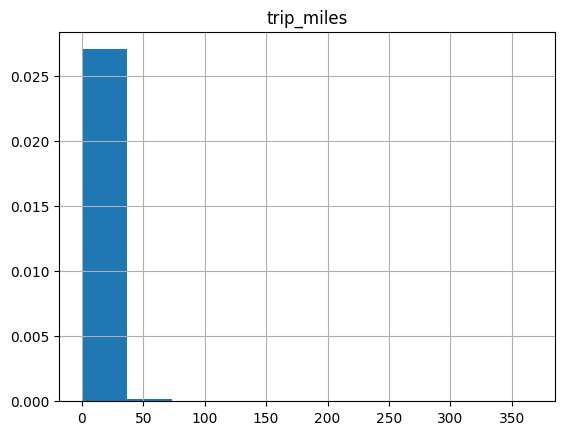

In [51]:
df.hist('trip_miles',density=True)

In [52]:
tip_percentage=(df_tippers.groupby('day_name')['tip'].count()/df.groupby('day_name')['tip'].count()) * 100 #percentage of tip in each day 
tip_percentage
tip_percentage.reindex(WEEKDAYS)

day_name
Monday       25.061453
Tuesday      25.337359
Wednesday    25.858984
Thursday     25.334603
Friday       25.279530
Saturday     25.032407
Sunday       24.058333
Name: tip, dtype: float64

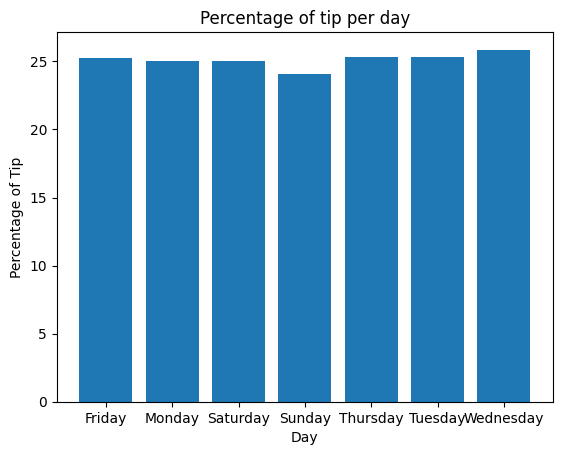

In [53]:
plt.bar(tip_percentage.index,tip_percentage.values)
plt.title('Percentage of tip per day')
plt.xlabel('Day')
plt.ylabel('Percentage of Tip')
plt.show()

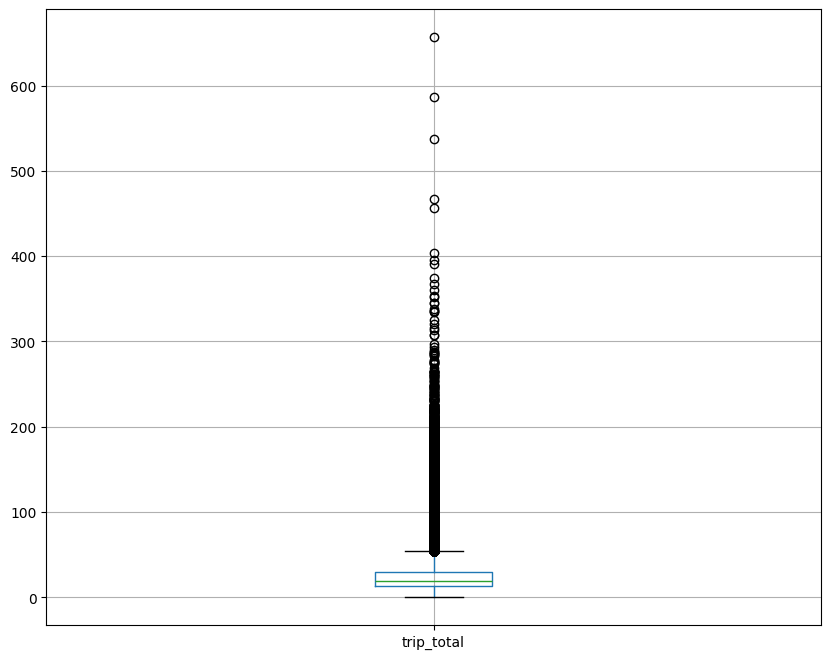

In [54]:
def plot_box(df,column_name):
    plt.figure(figsize = (10,8))
    df.boxplot(column_name)
plot_box(df,'trip_total')

    
#from the given box plot , we can see the outliers for the fare starts beyound the amount 50 approximately

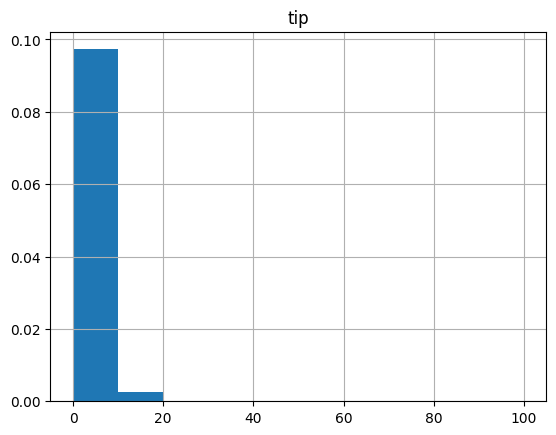

In [55]:
def plot_hist(df,column_name):
    df.hist(column_name,density=True)
plot_hist(df,'tip')
#from the obtained histogram , we can observe that the fare's distribution is heavily with in 0 - 75

In [56]:
def calculate_quantiles(df,column_name):
    third_quantile =  df[column_name].quantile(0.75)  #this is our q3 
    first_quantile =  df[column_name].quantile(0.25)  #this is our q1
    return first_quantile,third_quantile
calculate_quantiles(df,'fare')    

def get_outliers(df,column_name,calculate_quantiles):
    q1,q3 = calculate_quantiles(df,column_name)
    outliers = df[(df[column_name]>q3)|(df[column_name]<q1)]
    return outliers
fare_outliers = get_outliers(df,'fare',calculate_quantiles)  
fare_outliers.describe().fare
    

count    302041.000000
mean         23.277717
min           0.000000
25%           7.500000
50%          25.000000
75%          32.500000
max         637.500000
std          19.781313
Name: fare, dtype: float64

In [57]:
def get_inliers(df,column_name,calculate_quantiles):
    q1,q3 = calculate_quantiles(df,column_name)
    inliers = df[(df[column_name]>q1) & (df[column_name]<q3)]
    return inliers
fare_inliers = get_inliers(df,'fare',calculate_quantiles)    
fare_inliers.describe().fare

count    255501.000000
mean         15.557689
min          12.500000
25%          12.500000
50%          15.000000
75%          17.500000
max          20.000000
std           2.740459
Name: fare, dtype: float64

In [58]:
#from the given result we can observe that both the mean and standard deviation have drastic difference between them 

In [59]:
df.groupby('day_name')['tip'].describe().reindex(WEEKDAYS)
#from the result below, we can observe that the average tip amount on thursday is highest and saturday is the lowest
#we can also observe the fact that more than 75 % of people didnot tip on sunday , as all the quartile values of tip in this day is literally zero

,count,mean,std,min,25%,50%,75%,max
day_name,,,,,,,,
Monday,78922.0,1.309952,3.009671,0.0,0.0,0.0,1.0,57.0
Tuesday,82479.0,1.291480,2.945485,0.0,0.0,0.0,1.0,61.0
Wednesday,87749.0,1.296585,2.921619,0.0,0.0,0.0,1.0,70.0
Thursday,95561.0,1.355553,3.124336,0.0,0.0,0.0,1.0,100.0
Friday,115730.0,1.284628,2.999008,0.0,0.0,0.0,1.0,70.0
Saturday,132688.0,1.149222,2.656089,0.0,0.0,0.0,1.0,83.0
Sunday,96823.0,1.216395,2.880735,0.0,0.0,0.0,0.0,75.0


<Axes: >

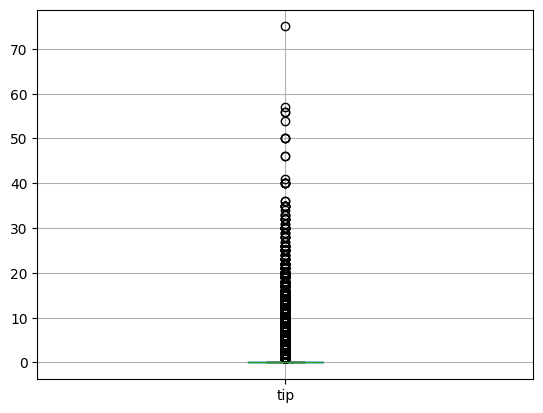

In [60]:
df[df['day_name']=='Sunday'].boxplot('tip')  #we can also see the same result using boxplot as all the tips on sunday are outliers

<Axes: title={'center': 'tip'}, xlabel='day_name'>

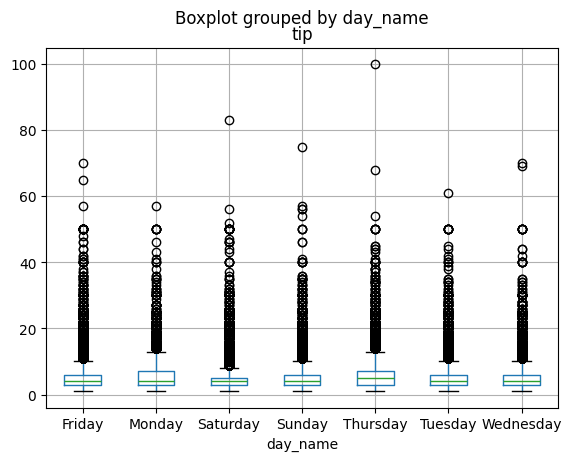

In [61]:
tippers = df[df['tip']>0]
tippers.boxplot(column = 'tip',by='day_name')  #boxplot to check outliers of tip amount based on specific day

<Axes: title={'center': 'tip'}, xlabel='hours'>

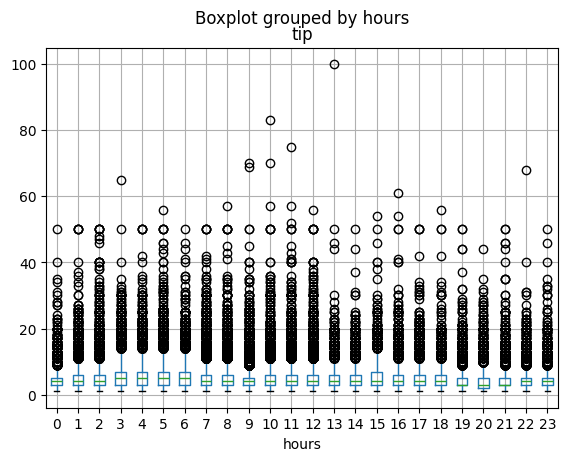

In [84]:
df['hours'] = df.trip_start_timestamp.apply(lambda x:x.hour)  #creating a new column called hour by converting the trip timestamp into hour
df_tippers = df[df['tip'] > 0].copy()
df_tippers.boxplot(column = 'tip' , by = 'hours')  #based on hours we are studying the tip amount  

<Axes: title={'center': 'Percentage of tip based on hours'}, xlabel='hours'>

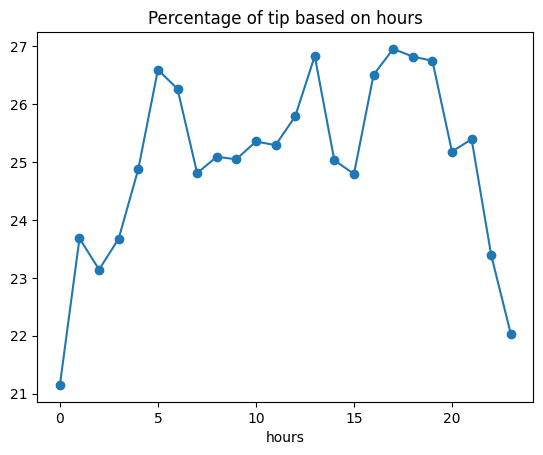

In [75]:
tip_percentage_based_on_hours = (df_tippers.groupby('hours')['tip'].count() / df.groupby('hours')['tip'].count()) * 100 
tip_percentage_based_on_hours
tip_percentage_based_on_hours.plot(marker='o',title = 'Percentage of tip based on hours')
#as we can see from the plot below , the tip percentage is higher at around 11 am, morning time and around 4 to 5 pm in evening

<Axes: title={'center': 'trip_miles'}, xlabel='hours'>

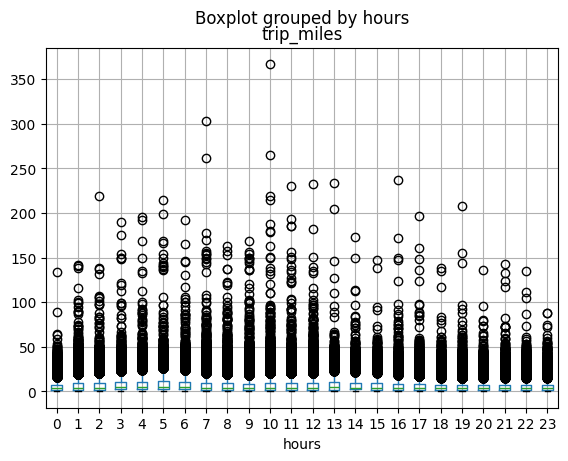

In [76]:
df.boxplot(column = 'trip_miles',by='hours')  
#from the figure below, we can also see that the trips are longer in the morning compared to other times , this also might be the case for the tip percentage to be higher in morning

<Axes: xlabel='trip_miles', ylabel='tip'>

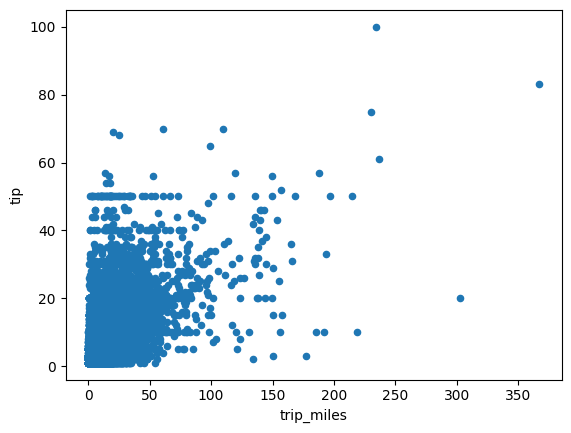

In [77]:
df_tippers.plot(kind='scatter',x = 'trip_miles',y='tip',marker='o')  


In [89]:
df_tippers['tip'].corr(df_tippers['trip_miles']) 
df_tippers
#as we can see that the tip and the  trip miles is positively correlated, so increase in one variable can cause increase in another variable too

,trip_start_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,trip_total,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,date,day_name,hours
1,2022-01-01 00:00:00,2299.0,25.0,32.5,7.0,7.18,46.68,0,1,41.878866,-87.625192,NaN,NaN,2022-01-01,Saturday,0
10,2022-01-01 00:00:00,714.0,2.8,7.5,6.0,2.77,16.27,0,1,41.809018,-87.659167,41.817366,-87.698861,2022-01-01,Saturday,0
11,2022-01-01 00:00:00,964.0,1.5,10.0,5.0,2.87,17.87,0,1,41.885281,-87.657233,41.884987,-87.620993,2022-01-01,Saturday,0
12,2022-01-01 00:00:00,1425.0,1.3,27.5,5.0,0.00,32.50,0,1,41.892042,-87.631864,41.891972,-87.612945,2022-01-01,Saturday,0
16,2022-01-01 00:15:00,711.0,4.6,10.0,5.0,3.60,18.60,0,1,41.877406,-87.621972,41.908379,-87.670945,2022-01-01,Saturday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691082,2022-12-31 11:45:00,469.0,1.9,7.5,3.0,2.91,13.41,0,1,41.965142,-87.676578,41.958155,-87.653022,2022-12-31,Saturday,11
691087,2022-12-31 11:45:00,382.0,1.6,10.0,3.0,3.47,16.47,0,1,41.922083,-87.634156,41.942692,-87.651771,2022-12-31,Saturday,11
691092,2022-12-31 11:45:00,1702.0,24.5,25.0,7.0,8.44,40.44,0,1,NaN,NaN,41.922686,-87.649489,2022-12-31,Saturday,11
691093,2022-12-31 11:45:00,258.0,0.5,5.0,3.0,2.91,10.91,0,1,41.890922,-87.618868,41.890922,-87.618868,2022-12-31,Saturday,11


In [99]:

df_tippers['trip_seconds'].isnull().sum()
df_tippers = df_tippers.dropna(subset = ['trip_seconds'])  #dropping the null trip seconds column
df_tippers['trip_seconds'].isnull().sum()

np.int64(0)

<Axes: xlabel='hours_duration', ylabel='tip'>

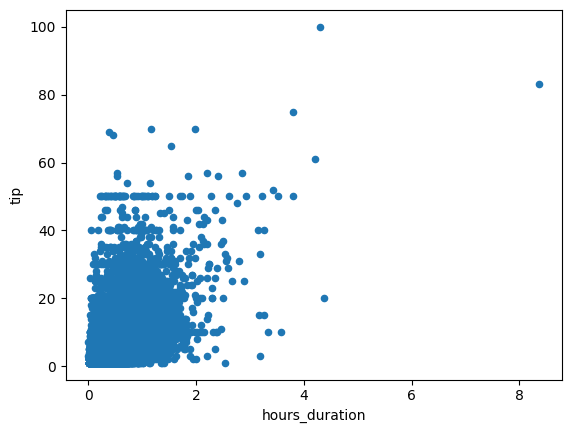

In [100]:
df_tippers['hours_duration'] = df_tippers.loc[:,'trip_seconds'].astype(int) / (60 * 60)
df_tippers.plot(kind='scatter',x='hours_duration',y='tip')  #visualizing the relationship between trip duration in hours and the amount of the tip

In [84]:
df_tippers

,trip_start_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,trip_total,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,date,day_name,hours
1,2022-01-01 00:00:00,2299.0,25.0,32.5,7.0,7.18,46.68,0,1,41.878866,-87.625192,NaN,NaN,2022-01-01,Saturday,0
10,2022-01-01 00:00:00,714.0,2.8,7.5,6.0,2.77,16.27,0,1,41.809018,-87.659167,41.817366,-87.698861,2022-01-01,Saturday,0
11,2022-01-01 00:00:00,964.0,1.5,10.0,5.0,2.87,17.87,0,1,41.885281,-87.657233,41.884987,-87.620993,2022-01-01,Saturday,0
12,2022-01-01 00:00:00,1425.0,1.3,27.5,5.0,0.00,32.50,0,1,41.892042,-87.631864,41.891972,-87.612945,2022-01-01,Saturday,0
16,2022-01-01 00:15:00,711.0,4.6,10.0,5.0,3.60,18.60,0,1,41.877406,-87.621972,41.908379,-87.670945,2022-01-01,Saturday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691082,2022-12-31 11:45:00,469.0,1.9,7.5,3.0,2.91,13.41,0,1,41.965142,-87.676578,41.958155,-87.653022,2022-12-31,Saturday,11
691087,2022-12-31 11:45:00,382.0,1.6,10.0,3.0,3.47,16.47,0,1,41.922083,-87.634156,41.942692,-87.651771,2022-12-31,Saturday,11
691092,2022-12-31 11:45:00,1702.0,24.5,25.0,7.0,8.44,40.44,0,1,NaN,NaN,41.922686,-87.649489,2022-12-31,Saturday,11
691093,2022-12-31 11:45:00,258.0,0.5,5.0,3.0,2.91,10.91,0,1,41.890922,-87.618868,41.890922,-87.618868,2022-12-31,Saturday,11


Text(0, 0.5, 'Latitude (degrees)')

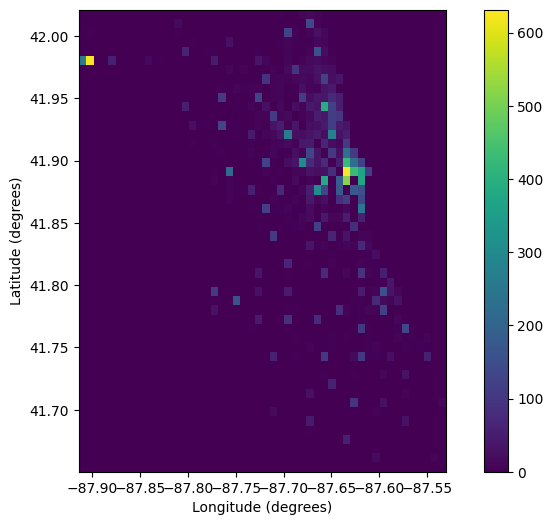

In [104]:
clean_df =df.dropna(subset = ['pickup_centroid_longitude','pickup_centroid_latitude'])   #dropping the null values from the column pickup longitude as well as latitude
longitude = clean_df['pickup_centroid_longitude'].to_numpy()
latitude = clean_df['pickup_centroid_latitude'].to_numpy()
fig,axes = plt.subplots(1,1,figsize = (10,6))
hist = axes.hist2d(longitude,latitude,bins = 50,density = True)
axes.set_aspect(1.3, "box")
fig.colorbar(hist[3])
axes.set_xlabel("Longitude (degrees)")
axes.set_ylabel("Latitude (degrees)")

#here we are visualizing the quanity of rides based on the pick up longitude and pickup latitude using heatmap
